# ЛАБОРАТОРНАЯ РАБОТА 2 - ЧАСТЬ 2
---------
## ЗАДАНИЕ 
--------
Выполнить следующие запросы с использованием двух различных библиотек - Pandas и PandaSQL:
* один произвольный запрос на соединение двух наборов данных
* один произвольный запрос на группировку набора данных с использованием функций агрегирования

Сравнить время выполнения каждого запроса в Pandas и PandaSQL.


In [1]:
%matplotlib inline
import pandas as pd
import pandasql as ps
import time
from datetime import datetime
import seaborn
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
android_devices = pd.read_csv('./data/android_devices.csv')
user_device = pd.read_csv('./data/user_device.csv')
user_usage = pd.read_csv('./data/user_usage.csv')

### Примеры простых запросов с использованием Pandas и PandaSQL

In [3]:
# pandasql code
def example1_pandasql(android_devices):
    simple_query = '''
        SELECT 
            Retail_Branding, 
            Device,
            Model
        FROM android_devices desk
        ORDER BY Model
        LIMIT 5
        '''
    return ps.sqldf(simple_query, locals())

# pandas code
def example1_pandas(android_devices):
    return android_devices[['Retail_Branding', 'Device', 'Model']].sort_values(by ='Model', ascending = False)[:5]

In [4]:
#PandaSQL
example1_pandasql(android_devices)

,Retail_Branding,Device,Model
0,Dell,streak,001DL
1,HTC,ace,001HT
2,Panasonic,pana1,003P
3,ZTE,blade,003Z
4,Huawei,msm7227,004HW


In [5]:
#Pandas
example1_pandas(android_devices)

,Retail_Branding,Device,Model
2237,Getac,zx70,zx70
6433,LeTV,Le1,x600
2297,Gini,w6,w6
2296,Gini,w5,w5
12875,ViewSonic,vsi8q_1_coho,vsi8q_1_coho


### Примеры слияния датасетов

In [6]:
def JOIN_pandas(user_usage, user_device):
    return pd.merge(user_usage,
    user_device,
    on='use_id')

#JOIN_pandas(user_usage, user_device)

def JOIN_pandasql(user_usage, user_device):
    join_query = '''
        SELECT *
        FROM user_usage
        JOIN user_device ON user_usage.use_id = user_device.use_id
    '''
    return ps.sqldf(join_query, locals())

#JOIN_pandasql(user_usage, user_device)

### Примеры с использованием функций агрегирования

In [7]:
def AGG_pandas(user_usage, user_device):
    merged = pd.merge(user_usage,
                 user_device,
                 on='use_id')   
    
    return merged.groupby("device").agg({
        "outgoing_mins_per_month": "mean",
        "outgoing_sms_per_month": "mean",
    })

#AGG_pandas(user_usage, user_device) 

def AGG_pandasql(user_usage, user_device):
    join_query = '''
        SELECT *
        FROM user_usage
        JOIN user_device ON user_usage.use_id = user_device.use_id
        GROUP BY device
    '''
    return ps.sqldf(join_query, locals()).groupby("device").agg({
        "outgoing_mins_per_month": "mean",
        "outgoing_sms_per_month": "mean",
    })

#AGG_pandasql(user_usage, user_device)

In [8]:
#        SELECT AVG(outgoing_mins_per_month) AS MeanOMPM FROM user_usage;
#        SELECT AVG(Price_unit) AS MeanOSPM FROM user_usage;
#       SELECT AVG(Price_unit) AS PriceAvg FROM user_usage;
        

### Тестирование скорости выполнения запросов

In [9]:
def count_mean_time(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

#### Тестирование примеров с слиянием датасетов

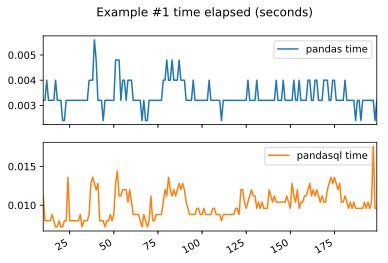

In [10]:
ex1_times  = []
for count in range(10, 200, 1):
    pandasql_time = count_mean_time(JOIN_pandasql, [user_usage[:count], user_device[:count]])
    pandas_time = count_mean_time(JOIN_pandas, [user_usage[:count], user_device[:count]])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})
ex1_times_df = pd.DataFrame(ex1_times)

ex1_times_df.columns = ['', 'pandas time', 'pandasql time']
ex1_times_df = ex1_times_df.set_index('')    
ax = ex1_times_df.plot(title = 'Example #1 time elapsed (seconds)', subplots = True)

#### Тестирование примеров с использованием функций агрегирования

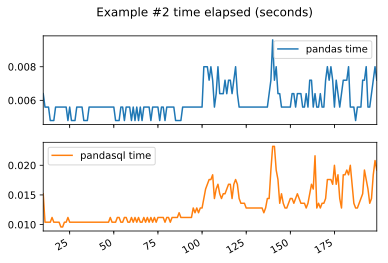

In [11]:
ex2_times  = []
for count in range(10, 200, 1):
    pandasql_time = count_mean_time(AGG_pandasql, [user_usage[:count], user_device[:count]])
    pandas_time = count_mean_time(AGG_pandas, [user_usage[:count], user_device[:count]])
    ex2_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})
ex2_times_df = pd.DataFrame(ex2_times)

ex2_times_df.columns = ['', 'pandas time', 'pandasql time']
ex2_times_df = ex2_times_df.set_index('')    
ax = ex2_times_df.plot(title = 'Example #2 time elapsed (seconds)', subplots = True)